## Building a Natural Language Processing (NLP) Model that Rates the Sentiment of Tweets about Apple and Google Products as Positive, Negative or Neutral.

+ **Student:** Wambui Munene
+ **Student pace:** DSPT08
+ **Scheduled project review date/time:** 12/02/2025 23.59 Hours
+ **Instructor name:** Samuel Karu

## Project Summary

### Data Understanding

Social media is a dynamic and widespread platform where customers freely express their thoughts and feelings about products, services, and brands.Using social media platforms like X (formerly twitter) to gauge sentiments is immensely valuable for businesses as it provides real-time and unfiltered insights into customer opinions and experiences. 

The objective of this project is to build a Natural Language Processing (NLP) model that rates the sentiment of tweets about Apple and Google products as positive, negative or neutral. The dataset used to build the model is sourced from CrowdFlower via data.world https://data.world/crowdflower/brands-and-product-emotions. This dataset consists of slightly over 9,000 human-rated tweets. 

- **Features:** prior to the preprocessing steps every row in the dataset only contains two feature columns; a string containing the full text of an individual tweet, and another string on the product being refereed to in the tweet. During preprocessing a string of tweet text will be converted inoto individual words creating more features. 
 - **Target:** the target consists of labels (emotions) for different tweets - positive, negative, neutral and 'can't tell'. By looking at the value counts for each sentiment, a decision will be made on which of the classes to use to achieve our objectives


### Problem Statement
Sentiment Analysis is a powerful tool that provides businesses with deep insights into public perception of their products and services. By leveraging sentiment analysis, companies can effectively gauge customer sentiment and understand the emotional tone behind customer interactions. This enables businesses to identify  areas of concern in real-time, allowing them to proactively address customer needs and improve their offerings.

By analyzing these sentiments from the tweets about their products and that of their competitor, Apple can tap into a wealth of authentic feedback that traditional surveys or feedback forms might miss. This immediate access to customer sentiment will allow them to  swiftly identify trends, preferences, and potential issues, allowing for proactive engagement and timely adjustments to strategies.

### Business Objectives
+ **Goal:**
     + Train classification models using the provided labeled tweets to identify sentiments (Positive, Neutral, Negative) about Apple and Google Products
 + **Specific Objectives:**
     + Identify the distribution of negative and positive tweets by company; this is crucial in assessing how the sentiments of Apple products compare to those of Google products (competition landscape analysis)
     + Train, tune and evaluate at least 3 classification models to identify positive, negative and neutral sentiments on previously unseen tweets.
     + Train,tune and evaluate at least 3 classification models to identify negative sentiments on previously unseen tweets
     + Provide to Apple the most optimal model to deploy on future (new) customers' data to identify negative sentiments on their products 
    

## Requirements to Meet Objectives
Below are the steps that will be taken to achieve the business objectives identified above.

### 1. Load the Data
Use Pandas to load the dataset and get a sense of what is in the dataset by visually inspecting the data.

### 2. Perform Data Cleaning with nltk 
- Use Regular Expressions (REGEX) to remove irrelevant information such as URLs,mentions(@) and hastags(#).
- Converte all text to lowercase to ensure uniformity
- Apply lemmatization to reduce words to their base forms for consistent analysis and reducing complexity
- Remove stop words (common words that typically do not carry significant meaning such as "the," "is," "in," "and," etc.). This helped in focusing on more meaningful words in the text, leading to better performance of NLP models.
- Tokenize the cleaned text

### 3. Perform Exploratory Data Analysis
  - Analyze the positive and negative sentiments by company.
 - Analyze the distribution of sentiment labels (positive, negative,neutral) using bar charts and value counts to understand class balance.
 - Visualize the top 10 most common words in the data set.
 - Created word clouds for positive, negative and neutral tweets to visualize most common words in each sentiment class
 
### 4. Vectorize the text data with TFidfVectorizer
- All data must be in numeric form inorder to fit a scikit-learn model. We will use Term Frequency-Inverse Document Frequency (TF-IDF) vectorizer from sklearn.feature_extraction.text to convert the text data into a vectorized format.Using TF-IDF is important because it effectively weighs the significance of words in a document relative to the entire dataset, helping to distinguish relevant terms from common ones.

 ### 5. Iteratively Build and Evaluate Baseline and Ensemble Models
- Using Pipelines, build and iteratively tune a Logistic Regression and Naive Bayes Models 
- Build and Train one or more ensemble models and compare the results with those of the tuned baseline models

 
 ### 6. Evaluation 
Evaluate model performance using the following metrics:

- Classification_report from Scikit-learn : This metric provides a convenient way to generate detailed performance metrics for classification tasks. It provides a summary of key metrics for each class, including accuracy, precision, recall, and F1-score
- confusion_matrix: It provides a visual summary of the prediction results by showing the count of true positives, true negatives, false positives, and false negatives.

### 7. Next Steps


### 1.1 Load and Clean the Dataset


In [3]:
# Import the necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


In [4]:
# Load the data as a DataFrame and display the first 10 columns
df = pd.read_csv('tweet_product_company.csv', encoding='ISO-8859-1')
df.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


This data set consists of tweets mainly focussed on apple and google products showing positive, negative or neutral emotions

In [5]:
# check the shape of the data
df.shape
print(f"This data set consists of {df.shape[0]} rows")
print(f"This data set consists of {df.shape[1]} columns")

This data set consists of 9093 rows
This data set consists of 3 columns


In [6]:
# Get column names
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

The three columns are of the object data type; the names of the columns are rather wordy, so I will rename the column names to more user-friendly names.

In [7]:
# Rename column names
df.rename(columns={
    'tweet_text': 'tweet',
    'emotion_in_tweet_is_directed_at': 'product',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'
}, inplace=True)

df.head()

,tweet,product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


The column names have been successfully renamed

In [8]:
# Get column attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9092 non-null   object
 1   product    3291 non-null   object
 2   sentiment  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


There are significant null values under the product column accounting to more than 60% of the data set. I will first try to fill this column with either Apple or Google if the tweet contains the word iphone, ipad or google. Then fill all the remaining NAN values with 'unknown'.

In [9]:
# Get value counts to see the distribution of products
df['product'].value_counts()

product
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

The product distribution seems quite repetitive. All google products will be labelled Google while all Apple products(ipads/iphone) will be labelled Apple.

In [10]:
# Define a function to categorize products
def categorize_product(tweet):
    if pd.isnull(tweet):
        return 'unknown'
    tweet = tweet.lower()
    if 'iphone' in tweet or 'ipad' in tweet or 'apple' in tweet:
        return 'Apple'
    elif 'google' in tweet or 'android' in tweet:
        return 'Google'
    else:
        return 'unknown'

# Apply the function to the 'tweet' column and fill the 'product' column
df['product'] = df['tweet'].apply(categorize_product)

# Verify the changes
df.head()



,tweet,product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Apple,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Apple,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Apple,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Apple,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [11]:
 df['product'].value_counts()

product
Apple      5525
Google     2781
unknown     787
Name: count, dtype: int64

This  has immensely improved the product labeling.

In [12]:
# Check for missing values in the DataFrame
df.isnull().sum()

tweet        1
product      0
sentiment    0
dtype: int64

In [13]:
# Drop row with Null values
df= df.dropna()

# Check for missing values in the DataFrame
df.isnull().sum()

tweet        0
product      0
sentiment    0
dtype: int64

There are now no missing values in the dataset. 


In [14]:
# check the value counts for the sentiment column
df['sentiment'].value_counts()

sentiment
No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

There are 4 labels in the sentiment column. The sentiment wordings are quite wordy, so I will change the wordings to Positive, Negative and Neutral and drop the rows where the sentiment is 'I can't tell'

In [15]:
# Replace sentiments
df.loc[:, 'sentiment'] = df['sentiment'].replace({
    'No emotion toward brand or product': 'Neutral',
    'Positive emotion': 'Positive',
    'Negative emotion': 'Negative'
})

# Drop rows where sentiment is 'I can't tell'
df = df[df['sentiment'] != "I can't tell"]

# Verify the changes
print(df['sentiment'].value_counts())
print()
print(df.head())



sentiment
Neutral     5388
Positive    2978
Negative     570
Name: count, dtype: int64

                                               tweet product sentiment
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   Apple  Negative
1  @jessedee Know about @fludapp ? Awesome iPad/i...   Apple  Positive
2  @swonderlin Can not wait for #iPad 2 also. The...   Apple  Positive
3  @sxsw I hope this year's festival isn't as cra...   Apple  Negative
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...  Google  Positive


In [16]:
# Make a copy of the df prior to preprocessing
df_copy = df.copy()
df_copy.head()

,tweet,product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Apple,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Apple,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,Apple,Positive
3,@sxsw I hope this year's festival isn't as cra...,Apple,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive


The 'I can't tell' label has been dropped.The tweets are mostly neutral and positive with very few negative tweets - this is a class imbalanced dataset and will use various resampling techniques to balance the dataset for modeling. 

### 1.2 Data Splitting 
The data will be will split into the training and test sets.The splits are 70% for training, 30% for testing. 

In [17]:
# Import the relevant library from scikit-learn to split the data
from sklearn.model_selection import train_test_split

# DeFine the features and target
X = df['tweet']
y = df['sentiment']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (6255,)
X_test shape: (2681,)
y_train shape: (6255,)
y_test shape: (2681,)


### 1.3 Text Transformations
In this section, we will start the process of preparing the feature column (tweet) for EDA and vectorization. This will involve:
- removing unnessary text and symbols like URLs, mentions (@),hashtags(#),links,numbers,punctuation and symbols
- convert all text to lowercase to ensure uniformity
- apply lemmatization to reduce words to their base forms for consistent analysis and reducing complexity
- remove stop words (common words that typically do not carry significant meaning such as "the," "is," "in," "and," etc.). 
- tokenize the cleaned text into individual words

In [18]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Define a function for text preprocessing
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#', '', text)
    # Remove [video] and {link}
    text = re.sub(r'\[.*?\]|\{.*?\}', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation and symbols
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove the word 'rt'(retweets)
    text = re.sub(r'\brt\b', '', text)
    # Remove the words 'sxsw' and 'austin'(name of conference and city that were subject to the tweets)
    text = re.sub(r'\bsxsw\b|\baustin\b', '', text)
    # Lemmatize text
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


# Apply the preprocessing function to the text data
X_train_preprocessed = X_train.apply(preprocess_text)
X_test_preprocessed = X_test.apply(preprocess_text)

# Verify the changes
print("Training Set:")
print(X_train_preprocessed.head())

print("\nTest Set:")
print(X_test_preprocessed.head())



Training Set:
8159                        alright someone need buy ipad
1814    building custom android home screen sxswi stuf...
3851    line already forming temp apple storeand doesn...
3610    google try give doodle whimsical fun spirit go...
3564    think might quit resume tonight ipadiphone tet...
Name: tweet, dtype: object

Test Set:
563     ûï google doesnt place value domain extension ...
6412    one minute ago guy spoke outside apple popup s...
1348                bring laptopipad go participate today
7000                            iphone apps keep grooving
4889    umm hello android awesome new version iphone n...
Name: tweet, dtype: object


The feature column has now been transformed into lowercase strings without numbers and symbols. The next step is to tokenize the cleaned text. Tokenization is the process of converting the tweets into individual words. 

In [19]:
from nltk.tokenize import word_tokenize

# Create DataFrames to store the data
train_df = pd.DataFrame({'tweet': X_train_preprocessed})
test_df = pd.DataFrame({'tweet': X_test_preprocessed})

# Define a function for tokenization
def tokenize_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    return tokens

# Step 2: Create a new column for the tokenized text
train_df['tweet_tokenized'] = train_df['tweet'].apply(tokenize_text)
test_df['tweet_tokenized'] = test_df['tweet'].apply(tokenize_text)

# Display the first 5 rows of each set
print("Training Set - First 5 Rows:")
print(train_df.head())
print("\nTest Set - First 5 Rows:")
print(test_df.head())

# Check the shapes of the DataFrames
print("\nTraining Set Shape:", train_df.shape)
print("Test Set Shape:", test_df.shape)

Training Set - First 5 Rows:
                                                  tweet  \
8159                      alright someone need buy ipad   
1814  building custom android home screen sxswi stuf...   
3851  line already forming temp apple storeand doesn...   
3610  google try give doodle whimsical fun spirit go...   
3564  think might quit resume tonight ipadiphone tet...   

                                        tweet_tokenized  
8159                [alright, someone, need, buy, ipad]  
1814  [building, custom, android, home, screen, sxsw...  
3851  [line, already, forming, temp, apple, storeand...  
3610  [google, try, give, doodle, whimsical, fun, sp...  
3564  [think, might, quit, resume, tonight, ipadipho...  

Test Set - First 5 Rows:
                                                  tweet  \
563   ûï google doesnt place value domain extension ...   
6412  one minute ago guy spoke outside apple popup s...   
1348              bring laptopipad go participate today   
7000  

The tweets are now tokenized into individual words and a dataframe created with two columns - the preprocessed tweets and the tokenized tweets. The next step is to perform Exploratory Data Analysis (EDA) before vectorization

### 1.4 Exploratory Data Analysis (EDA) 
In this section we will: 

1. Analyze Sentiment Distribution: Use bar charts and value counts to understand the class balance of sentiment labels (positive, negative, neutral). This helps identify any class imbalances.

2. Visualize Top Common Words: Identify and display the top 10 most common words in the dataset. This gives an overview of the predominant terms.

3. Create Word Clouds: Generate word clouds for positive, negative, and neutral tweets to visualize the most common words in each sentiment class. This provides a visual representation of word frequency and sentiment-specific terms.

We will combine the train_df and the y_train (sentiments) into a single data frame. However we will use a copy  of the train_df to avoid modifying the original DataFrame.

In [20]:
# Confirm that the number of rows are the same
print(y_train.shape)
print(train_df.shape)

(6255,)
(6255, 2)


In [21]:
# Combine train_df and y_train
train_eda_df = train_df.copy()
train_eda_df['target'] = y_train.values

# Display the first few rows of the combined DataFrame
train_eda_df.head()



,tweet,tweet_tokenized,target
8159,alright someone need buy ipad,"[alright, someone, need, buy, ipad]",Neutral
1814,building custom android home screen sxswi stuf...,"[building, custom, android, home, screen, sxsw...",Neutral
3851,line already forming temp apple storeand doesn...,"[line, already, forming, temp, apple, storeand...",Neutral
3610,google try give doodle whimsical fun spirit go...,"[google, try, give, doodle, whimsical, fun, sp...",Positive
3564,think might quit resume tonight ipadiphone tet...,"[think, might, quit, resume, tonight, ipadipho...",Positive


In [22]:
train_eda_df.shape

(6255, 3)

In [23]:
train_eda_df['target'].value_counts()

target
Neutral     3776
Positive    2098
Negative     381
Name: count, dtype: int64

#### 1.4.1 Analyze Sentiment Distribution

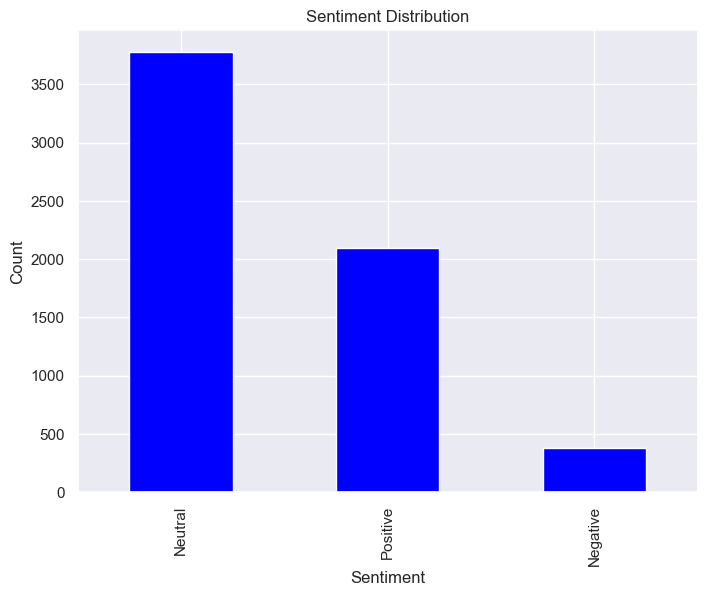

In [24]:
import matplotlib.pyplot as plt

# Count the sentiment labels
sentiment_counts = train_eda_df['target'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='blue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


The tweets are mostly neutral and positive with very few negative tweets, indicative of satisfaction with the products. However this class imbalance may prove to be problematic during modeling and we will handle it with various techniques e.g. SMOTE to oversample the minority class, and/or resampling of the majority classes

#### 1.4.2 Visualize Top Common Words

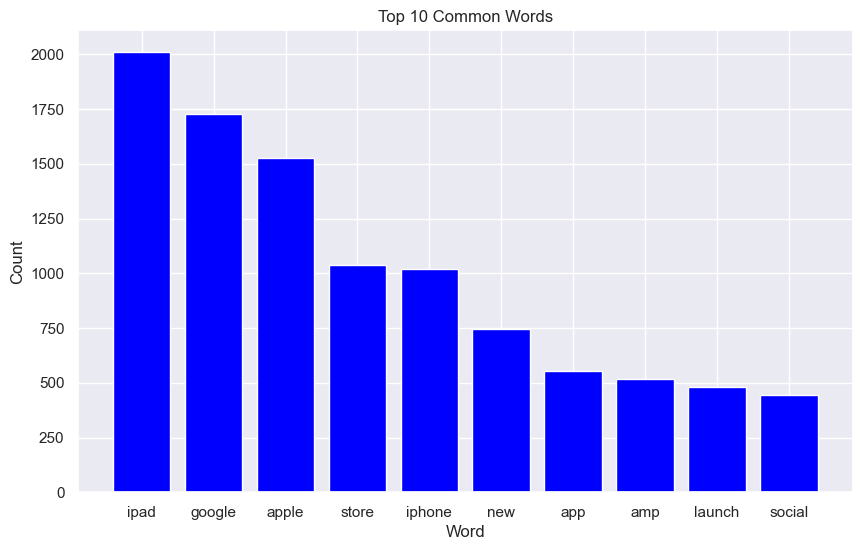

In [25]:
from collections import Counter

# Tokenize the cleaned text data
all_words = ' '.join(train_eda_df['tweet']).split()

# Get the top 10 common words
common_words = Counter(all_words).most_common(10)

# Create a DataFrame for visualization
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot the top common words
plt.figure(figsize=(10, 6))
plt.bar(common_words_df['Word'], common_words_df['Count'], color='blue')
plt.title('Top 10 Common Words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()


As is to be expected because the tweets are about Apple and Google products, the top words include ipad, apple, iphone,android etc meaning these words are common among tweets. The use of TF-IDF vectorization will put less weight on these words during modeling. However, I will visualize the top 10 words again excluding those common words. 

#### 1.4.3 Visualize Top Common Words Excluding Product Specific Words

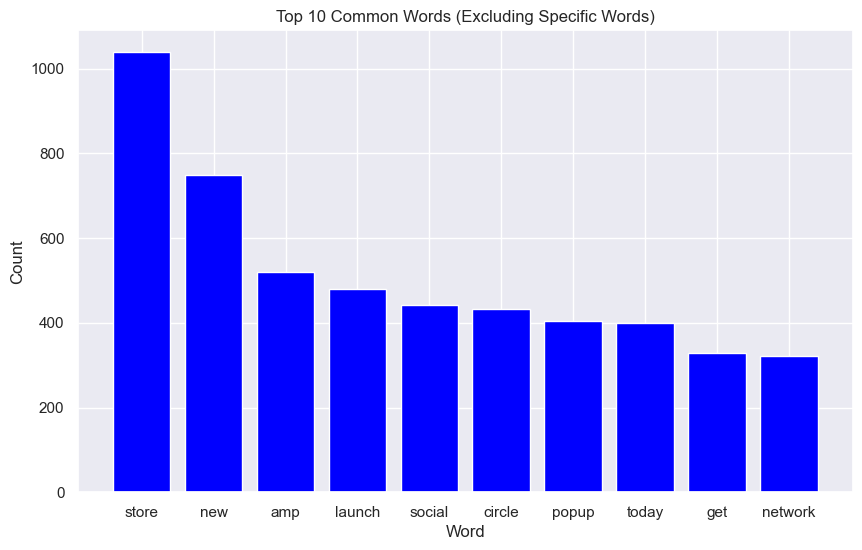

In [26]:

# List of words to exclude
exclude_words = {'ipad', 'google', 'apple', 'iphone', 'app','android','sxsw','austin'}

# Tokenize the cleaned text data
all_words = ' '.join(train_eda_df['tweet']).split()

# Remove the exclude words from the tokenized list
filtered_words = [word for word in all_words if word not in exclude_words]

# Get the top 10 common words
common_words = Counter(filtered_words).most_common(10)

# Create a DataFrame for visualization
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot the top common words excluding specified words
plt.figure(figsize=(10, 6))
plt.bar(common_words_df['Word'], common_words_df['Count'], color='blue')
plt.title('Top 10 Common Words (Excluding Specific Words)')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()


Even after removing the product related words and the name and location of the conference that was the subject of these tweets, the top 10 words do not have any emotional attributes - positive or negative. I will now visualize the top words by sentiment to see if emotive words emerge.

#### 1.4.4 Visualize Top Common Words by Sentiment

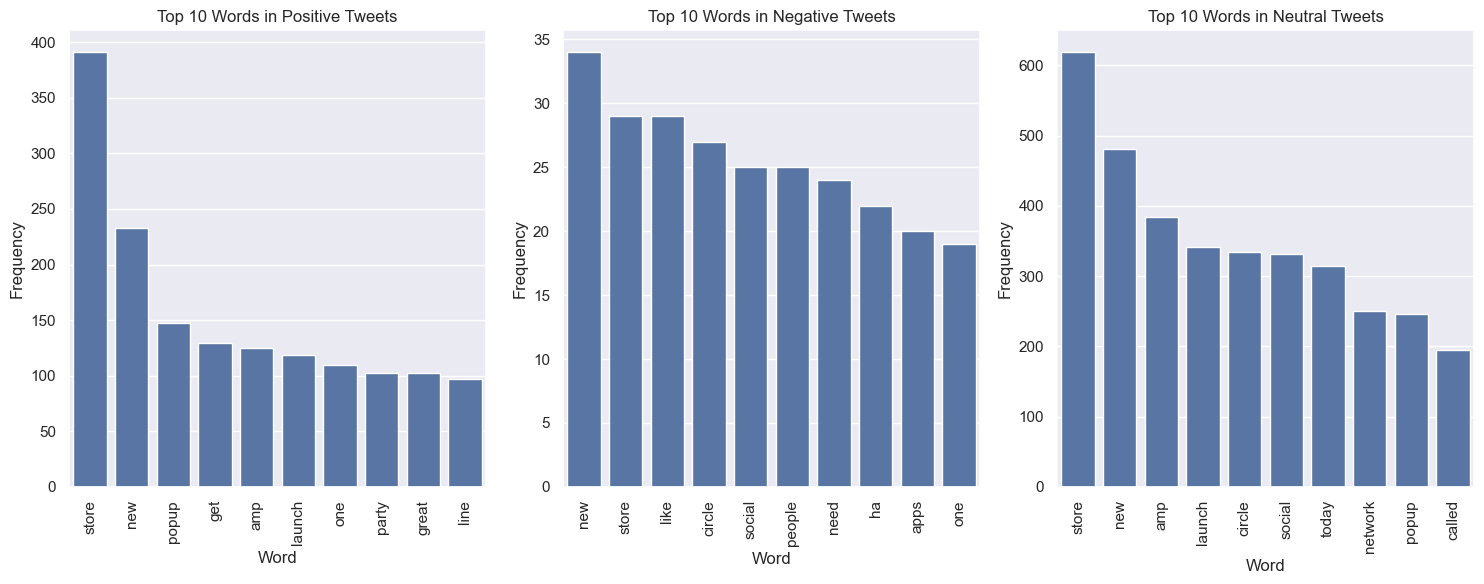

In [27]:
# List of words to exclude
exclude_words = {'ipad', 'google', 'apple', 'iphone', 'app', 'android', 'sxsw', 'austin'}

# Function to count word frequencies excluding specific words
def word_frequencies(data, sentiment, exclude_words, top_n=10):
    text = ' '.join(data[data['target'] == sentiment]['tweet'])
    words = [word for word in text.split() if word.lower() not in exclude_words]
    counter = Counter(words)
    common_words = counter.most_common(top_n)
    return common_words

# Plotting function for word frequencies in a single row
def plot_word_frequencies_single_row(train_eda_df, sentiments, exclude_words, top_n=10):
    fig, axs = plt.subplots(nrows=1, ncols=len(sentiments), figsize=(5*len(sentiments), 6))
    for i, sentiment in enumerate(sentiments):
        word_freq = word_frequencies(train_eda_df, sentiment, exclude_words, top_n)
        words = [word[0] for word in word_freq]
        frequencies = [word[1] for word in word_freq]
        sns.barplot(y=frequencies, x=words, ax=axs[i])
        axs[i].set_title(f'Top {top_n} Words in {sentiment} Tweets')
        axs[i].set_ylabel('Frequency')
        axs[i].set_xlabel('Word')
        axs[i].tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()

# Sentiments to plot
sentiments = ['Positive', 'Negative', 'Neutral']

# Plot top ten words for each sentiment in a single row
plot_word_frequencies_single_row(train_eda_df, sentiments, exclude_words)


From the charts above, the positive and neutral tweets have more words in common than with the negative tweets. The emotions are now more evident especially in the positive tweets. The positive tweets have words like 'get','party' and 'great'.The emotive words do not emerge as well in the neutral and negative sentiments 
I will now create word clouds to see if we can pick out more emotive words, especially in the neutral and negative sentiments.

#### 1.4.5 Create Word Clouds by Sentiment

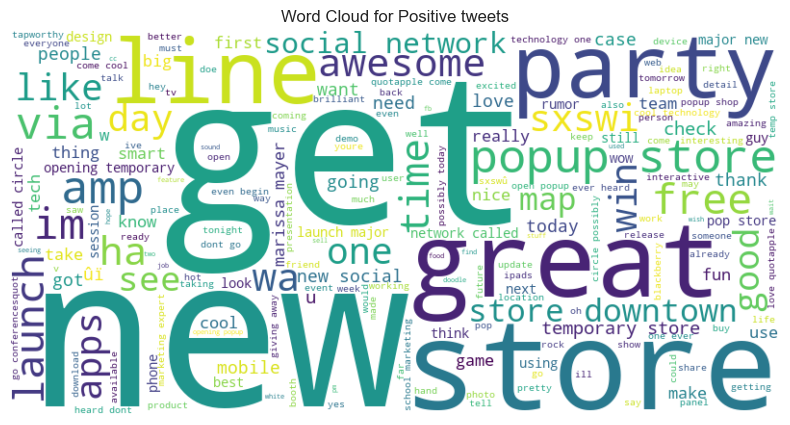

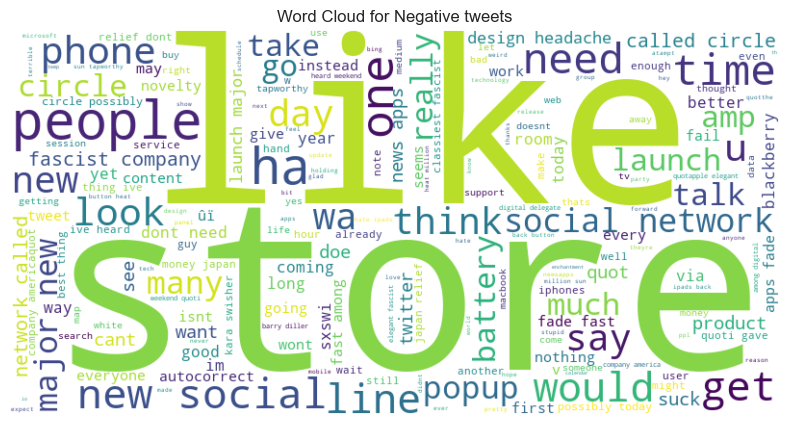

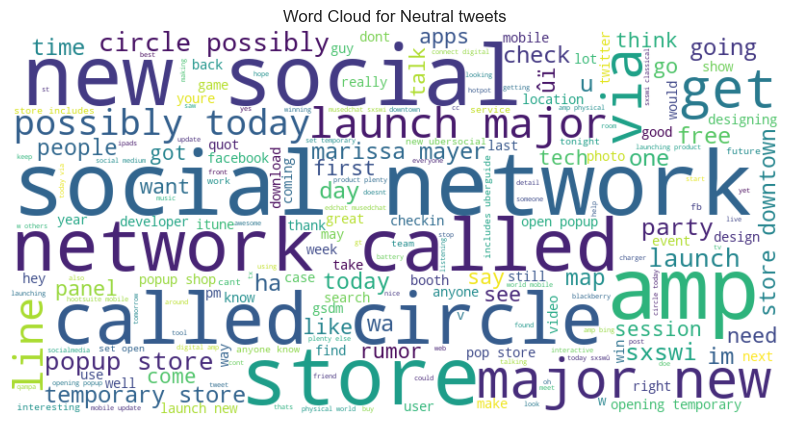

In [28]:
from wordcloud import WordCloud

# List of words to exclude
exclude_words = {'ipad', 'google', 'apple', 'iphone', 'app', 'android', 'sxsw', 'austin'}

# Function to generate word clouds
def generate_wordcloud(data, sentiment, exclude_words):
    text = ' '.join(data[data['target'] == sentiment]['tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=exclude_words).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} tweets')
    plt.show()

# Generate word clouds for each sentiment
generate_wordcloud(train_eda_df, 'Positive', exclude_words)
generate_wordcloud(train_eda_df, 'Negative', exclude_words)
generate_wordcloud(train_eda_df, 'Neutral', exclude_words)



From the word cloud above you can see words like 'love', 'nice', 'great','awesome' in positive tweets and words like 'suck', 'fail' and 'headache','fascist' in negative tweets. The neutral tweets do not seem to have such strong words. 

### 1.5 Text Data Vectorization
I will use Term Frequency=Inverse Document Frequency (TF-IDF) to transform text data into numerical features, capturing the importance of words.Using TF-IDF is important because it effectively weighs the significance of words in a document relative to the entire dataset, helping to distinguish relevant terms from common ones. This is especially important for this dataset as we have seen from the EDA process above that the tweets have a lot of words in common, and we want the vectorization to place less importance to these common words.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to join the list of tokens back into a single string
def join_tokens(tokens):
    return ' '.join(tokens)

# Join tokens for each preprocessed set, applying it to each element
X_train_joined = train_df['tweet_tokenized'].apply(join_tokens)
X_test_joined = test_df['tweet_tokenized'].apply(join_tokens)


tfidf_vectorizer = TfidfVectorizer()

# Apply TF-IDF to the joined tokenized text
train_tfidf = tfidf_vectorizer.fit_transform(X_train_joined)
test_tfidf = tfidf_vectorizer.transform(X_test_joined)

# Verify the shape of the transformed data
print("Training set shape:", train_tfidf.shape)
print("Testing set shape:", test_tfidf.shape)

# Display the first 5 rows of the sparse matrix
train_tfidf_df = pd.DataFrame(train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
test_tfidf_df = pd.DataFrame(test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("Training set:\n", train_tfidf_df.head())
print("Testing set:\n", test_tfidf_df.head())


Training set shape: (6255, 7935)
Testing set shape: (2681, 7935)
Training set:
    ______  _______quot   _û  aapl  aaron   ab  abacus  abba  abc  aber  ...  \
0     0.0          0.0  0.0   0.0    0.0  0.0     0.0   0.0  0.0   0.0  ...   
1     0.0          0.0  0.0   0.0    0.0  0.0     0.0   0.0  0.0   0.0  ...   
2     0.0          0.0  0.0   0.0    0.0  0.0     0.0   0.0  0.0   0.0  ...   
3     0.0          0.0  0.0   0.0    0.0  0.0     0.0   0.0  0.0   0.0  ...   
4     0.0          0.0  0.0   0.0    0.0  0.0     0.0   0.0  0.0   0.0  ...   

   ûïfoursquare  ûïline  ûïmore  ûïmuteû  ûïspecialsû  ûïspecialûï  ûïthe  \
0           0.0     0.0     0.0      0.0          0.0          0.0    0.0   
1           0.0     0.0     0.0      0.0          0.0          0.0    0.0   
2           0.0     0.0     0.0      0.0          0.0          0.0    0.0   
3           0.0     0.0     0.0      0.0          0.0          0.0    0.0   
4           0.0     0.0     0.0      0.0          0.0       

As expected, the features are quite large because they represent the  unique words found in all the tweets(corpus). Each row corresponds to a document (a tweet), and each column represents a unique term (word or n-gram) from the entire corpus.

The fact that the matrices are sparse (i.e., having many zeros) is expected and typical for TF-IDF representations, especially when using n-grams. Sparse matrices are well-suited for the machine learning models that I plan to use. The also have less computational overhead than dense matrices.

I intend to use TruncatedSVD, a method that converts the original features into a new set of orthogonal components, maximizing the variance captured in the data and works well with dense matrices.

Since there is significant class imbalance especially with the negative class, I will intially use SMOTE to address this.



## 2.0 Business Objectives
1. Identify the distribution of negative and positive tweets by company; (competition landscape analysis)
2. Train, tune and evaluate at least 3 classification models to identify positive, negative and neutral sentiments 
3. Train,tune and evaluate at least 3 classification models to identify negative sentiments on previously unseen tweets
4. Provide to Apple the most optimal model to deploy on future (new) customers' data to identify negative sentiments on their products 

### 2.1 Objective  # 1
### Identify the Distribution of Negative and Positive Tweets by Company

In [30]:
# Get the count of the representation of each product
round(df_copy['product'].value_counts(normalize=True),2)

product
Apple      0.61
Google     0.31
unknown    0.09
Name: proportion, dtype: float64

Apple products are the subject of most tweets in this dataset. At 60% against 30% for google, the tweets are twice as many.

In [31]:
# Filter out rows where the product is 'unknown'
df_filtered = df_copy[df_copy['product'] != 'unknown']

# Get the count of each sentiment by product
sentiment_counts = df_filtered.groupby(['sentiment', 'product']).size().unstack(fill_value=0)

# Normalize the counts to get percentages within each sentiment class
sentiment_percentages_by_class = round(sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100, 2)

# Display the percentages
print(sentiment_percentages_by_class)

product    Apple  Google
sentiment               
Negative   73.81   26.19
Neutral    61.87   38.13
Positive   72.48   27.52


The distribution of both Positive and Negative tweets is disproportionately high for Apple products.It seems people have strong emotions about Apple products on both ends of the spectrum.

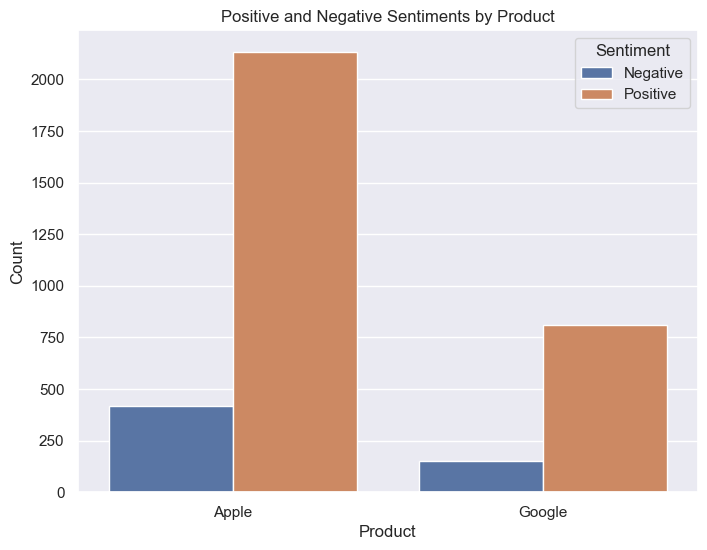

<Figure size 640x480 with 0 Axes>

In [69]:
# Further filter the DataFrame to include only positive and negative sentiments
df_filtered = df_filtered[df_filtered['sentiment'].isin(['Positive', 'Negative'])]

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df_filtered, x='product', hue='sentiment')
plt.title('Positive and Negative Sentiments by Product')
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

# Save the plot as an image file
fig1 = plt.savefig('sentiments_by_product.png')

The tweets on Apple products are twice those of Google products.However, the Apple positive and negative tweets over 70% of all Google and Apple negative tweets while the positive tweets. This shows that Apple products are by far more popular than Google. However Apple needs to be extra vigilant to identify negative sentiments as they are proportionately much higher than those of Google. 

### 2.2 Objective # 2
### Train, Tune and Evaluate at  Classification Models to Identify Positive, Negative and Neutral sentiments

#### 2.2.1  Baseline Models with Pipelines

In [33]:
# Load all the libraries required for modeling
from imblearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Define Function for the Confusion Matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)

    plt.title(title, fontsize=12)
    plt.ylabel('Actual Label', fontsize=10)
    plt.xlabel('Predicted Label', fontsize=10)

    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [34]:
round(y_train.value_counts(normalize=True),2)

sentiment
Neutral     0.60
Positive    0.34
Negative    0.06
Name: proportion, dtype: float64

The traget classes are imbalanced with Negative tweets at about 6%. While this is good news for the companies, the ability of the model to distinguish negative tweets from the other clasees accurately (high recall) is a fundamental business objective. Negative sentiments provide crucial business intelligence for product improvement. To achieve this objective we will use SMOTE to oversample the minority class.

#### 2.2.2 Baseline Logistic Regression Model

Classification Report (Baseline Logistic Regression):
              precision  recall  f1-score  support
Negative           0.37    0.48      0.41   189.00
Neutral            0.74    0.72      0.73  1612.00
Positive           0.56    0.56      0.56   880.00
accuracy           0.65    0.65      0.65     0.65
macro avg          0.56    0.58      0.57  2681.00
weighted avg       0.66    0.65      0.65  2681.00


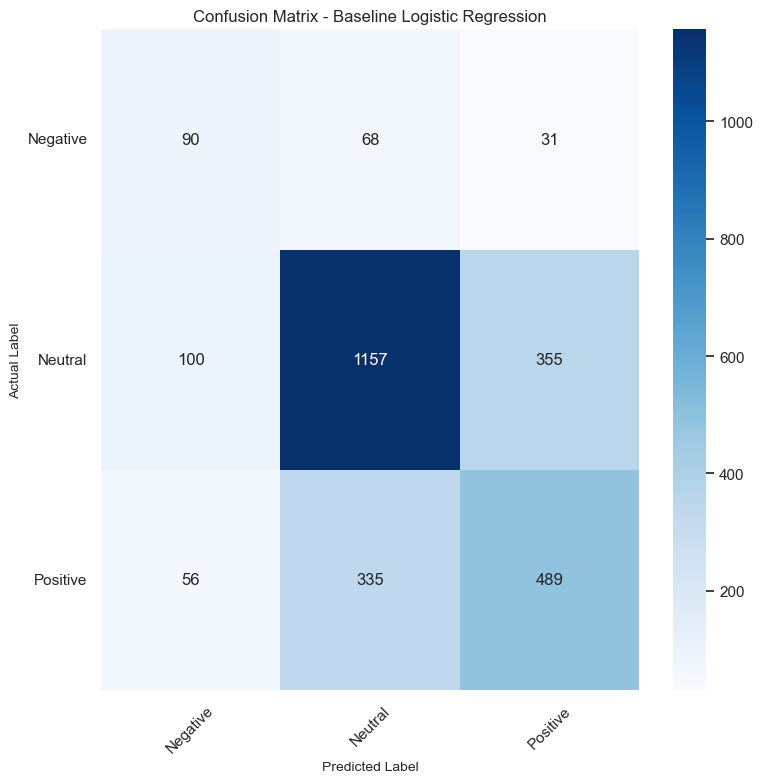

In [44]:
from imblearn.pipeline import Pipeline

# Create a pipeline with the estimator
pipe_lr = Pipeline([
    ('smote',SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced',random_state=42))
])

# Fit the pipeline on the training data
pipe_lr.fit(train_tfidf_df, y_train)

# Evaluate on the validation set
y_pred_lr = pipe_lr.predict(test_tfidf_df)

# Classification Report
class_report_lr = classification_report(y_test, y_pred_lr, target_names=['Negative', 'Neutral', 'Positive'],output_dict=True)
# Convert the dictionary to a DataFrame and transpose it
lr_report_df = pd.DataFrame(class_report_lr).transpose()

# Round the DataFrame to two decimal places
lr_report_df = lr_report_df.round(2)

# Display the title and the DataFrame
print("Classification Report (Baseline Logistic Regression):")
print(lr_report_df)

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_names = ['Negative', 'Neutral', 'Positive']

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix_lr, classes=class_names, title='Confusion Matrix - Baseline Logistic Regression')

The Accuracy Score is not that great at 65%. It is still better than random guessing, which for a 3-way class is 33.33%.Overall, the model performs well on Neutral sentiments but has lower effectiveness in identifying Positive and Negative sentiments. This is demonstrated by the moderate precision, recall and F1 scores of the Positive class and subpar scores by the Negative class. Improving the model's performance on these two classes could lead to better overall results.

- The model perform poorly in identifying the negative class, with lower precision, recall and F1 scores, indicating room for improvement.
- The model performs well on the Neutral class, with high precision, recall and F1 scores, suggesting good accuracy in identifying Neutral sentiments.
- The model has moderate performance on the Positive class, with balanced precision and recall, indicating a fair level of effectiveness in identifying Positive sentiments. There is still need for improvement.

Identifying Negative Sentiments is critical for this project; An Naive Bayes model will be trained to see if there is an improvement in identifying Negative tweets.

#### 2.2.3 Baseline Naive Bayes Model

Classification Report (Baseline Naive Bayes Model):
              precision  recall  f1-score  support
Negative           0.50    0.01      0.01   189.00
Neutral            0.65    0.94      0.77  1612.00
Positive           0.66    0.25      0.36   880.00
accuracy           0.65    0.65      0.65     0.65
macro avg          0.60    0.40      0.38  2681.00
weighted avg       0.64    0.65      0.58  2681.00


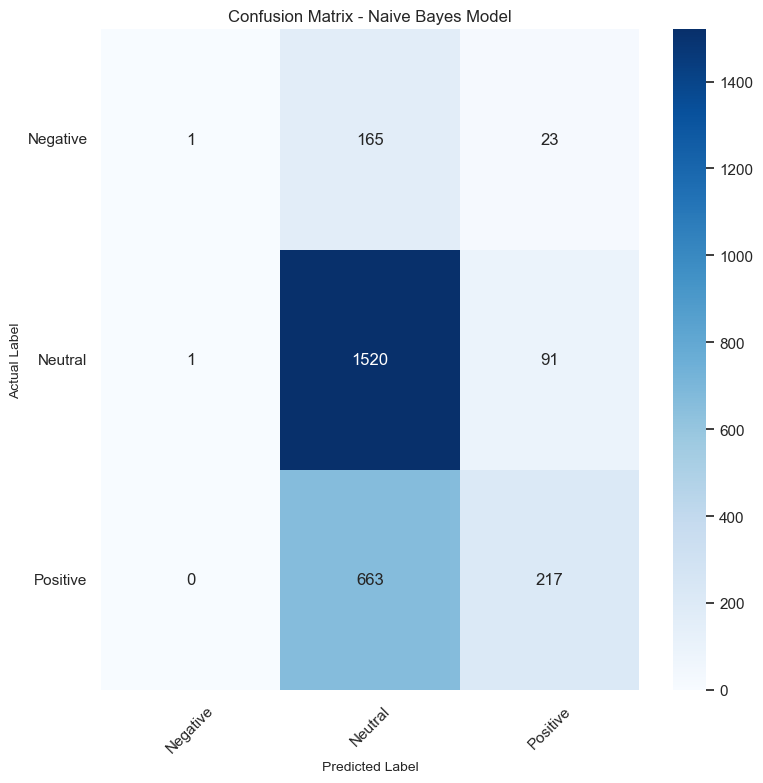

In [45]:
# Define the pipeline with SMOTE and Multinomial Naive Bayes
pipe_nb = Pipeline([
    ('clf', MultinomialNB())
])

# Fit the pipeline on the training data
pipe_nb.fit(train_tfidf_df, y_train)

# Evaluate on the validation set
y_pred_nb = pipe_nb.predict(test_tfidf_df)

# Classification Report
class_report_nb = classification_report(y_test, y_pred_nb, target_names=['Negative', 'Neutral', 'Positive'],
                output_dict=True)
# Convert the dictionary to a DataFrame and transpose it
nb_report_df = pd.DataFrame(class_report_nb).transpose()

# Round the DataFrame to two decimal places
nb_report_df = nb_report_df.round(2)

# Display the title and the DataFrame
print("Classification Report (Baseline Naive Bayes Model):")
print(nb_report_df)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion Matrix - Naive Bayes Model')


The Naive Bayes Model produces the same accuracy as the baseline Logistics Model.
- The model performs well on the Neutral class, with very high recall, high precision and F1-score.
- The recall and F1 scores for the Positive class are moderate but lower than those of the Logistic Regression Model.
- The recall and f1 scores of the Negative classes dismal at 1% an indication that the model is having a problem distinguishing between the negative class and all other classes.

We will try to tune the NB model to see if there is improvement.

#### 2.2.4 Hyperparameter Tuned Naive Bayes Model

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Hyperparameters: {'clf__alpha': 0.5, 'clf__fit_prior': True}
Classification Report (Tuned Naive Bayes Model):
              precision  recall  f1-score  support
Negative           0.50    0.01      0.01   189.00
Neutral            0.65    0.94      0.77  1612.00
Positive           0.66    0.25      0.36   880.00
accuracy           0.65    0.65      0.65     0.65
macro avg          0.60    0.40      0.38  2681.00
weighted avg       0.64    0.65      0.58  2681.00


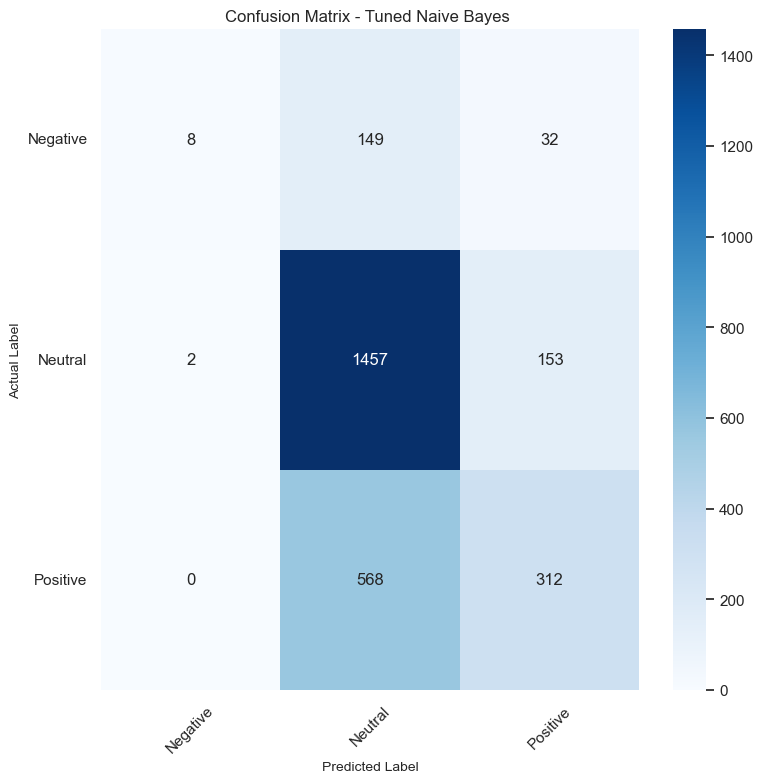

In [46]:
# Define the parameter grid for Grid Search
param_grid = {
    'clf__alpha': [0.1, 0.5, 1.0],  # Smoothing parameter
    'clf__fit_prior': [True, False]  # Whether to learn class prior probabilities
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=pipe_nb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(train_tfidf_df, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Best hyperparameters found by grid search
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Evaluate the best model on the validation set
y_pred_nb = best_model.predict(test_tfidf_df)
class_report_nb2 = classification_report(y_test, y_pred_nb, target_names=['Negative', 'Neutral', 'Positive'],
                output_dict=True)

# Convert the dictionary to a DataFrame and transpose it
nb2_report_df = pd.DataFrame(class_report_nb2).transpose()

# Round the DataFrame to two decimal places
nb2_report_df = nb2_report_df.round(2)

# Display the title and the DataFrame
print("Classification Report (Tuned Naive Bayes Model):")
print(nb_report_df)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion Matrix - Tuned Naive Bayes ')


The Accuracy Score of 66%, slightly better than the baseline NB model,and the Baseline Logistic Regression Model. 
- There is some slight improvent in the labeling of positive tweets.
- The model performs very well with Neutral tweets 
- The model still struggles significantly with negative tweets. 

WE will now use GridSearchCV to tune the Logistic Regression Model. 

#### 2.2.5  Hyperparameter Tuned Logistic Regression Model 


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Hyperparameters: {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
Classification Report (Tuned Logistic Regression):
              precision  recall  f1-score  support
Negative           0.42    0.39      0.40   189.00
Neutral            0.74    0.74      0.74  1612.00
Positive           0.57    0.58      0.57   880.00
accuracy           0.66    0.66      0.66     0.66
macro avg          0.57    0.57      0.57  2681.00
weighted avg       0.66    0.66      0.66  2681.00


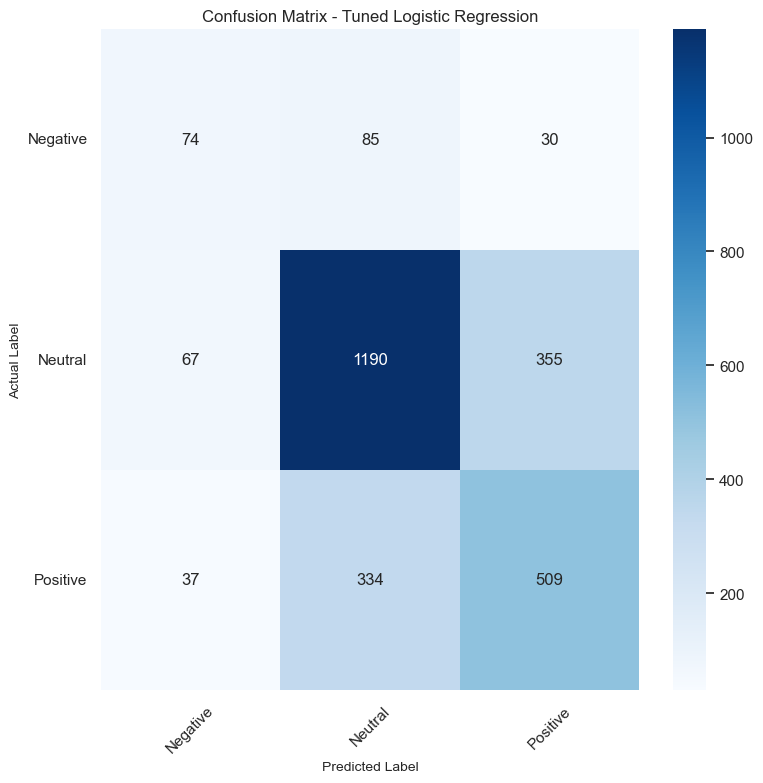

In [47]:

# Define the hyperparameters for grid search
param_grid = {
    'clf__C': [0.01, 0.1,10],              # Regularization strength for Logistic Regression
    'clf__penalty': ['l2'],              # Regularization penalty (L2 is common for LR)
    'clf__solver': ['liblinear','saga'] # Solver to use in the optimization problem
}

# Set up the GridSearchCV
grid_search = GridSearchCV(pipe_lr, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search on the training data
grid_search.fit(train_tfidf_df, y_train)

# Best hyperparameters found by grid search
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Evaluate on the validation set using the best estimator
y_pred_lr = grid_search.best_estimator_.predict(test_tfidf_df)

# Classification Report
class_report_lr2 = classification_report(y_test, y_pred_lr, target_names=['Negative', 'Neutral', 'Positive'],
                output_dict=True)

# Convert the dictionary to a DataFrame and transpose it
lr2_report_df = pd.DataFrame(class_report_lr2).transpose()

# Round the DataFrame to two decimal places
lr2_report_df = lr2_report_df.round(2)

# Display the title and the DataFrame
print("Classification Report (Tuned Logistic Regression):")
print(lr2_report_df)

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
# Plot the confusion matrix (assuming plot_confusion_matrix is a custom function)
plot_confusion_matrix(conf_matrix_lr, classes=class_names, title='Confusion Matrix - Tuned Logistic Regression')



While the tuned LR model has a marginal improvement in accuracy from the baseline model, the recall score for the negative class has dropped significantly from 48% to 39%.The positive and neutral classes scores are more or less the same.  
- The model struggles in identifying the negative class, with lower precision, recall and F1 scores, indicating room for improvement.
- The model performs well on the Neutral class, with high and balanced precision, recall and F1 scores, suggesting good accuracy in identifying Neutral sentiments.
- The model has moderate performance on the Positive class, with balanced precision and recall, indicating a fair level of effectiveness in identifying Positive sentiments.

Overall from the baseline models, the baseline Logistic Regression Model gives the best performance - in the sense that it is able to identify the negative class, which is critical for any business.

Next, we will train a Random Forest Ensemble Model.

#### 2.2.6  Random Forest Model

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters Random Forest: {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}
Classification Report (Random Forest):
              precision  recall  f1-score  support
Negative           0.66    0.21      0.32   189.00
Neutral            0.70    0.84      0.76  1612.00
Positive           0.60    0.48      0.53   880.00
accuracy           0.67    0.67      0.67     0.67
macro avg          0.65    0.51      0.54  2681.00
weighted avg       0.67    0.67      0.66  2681.00


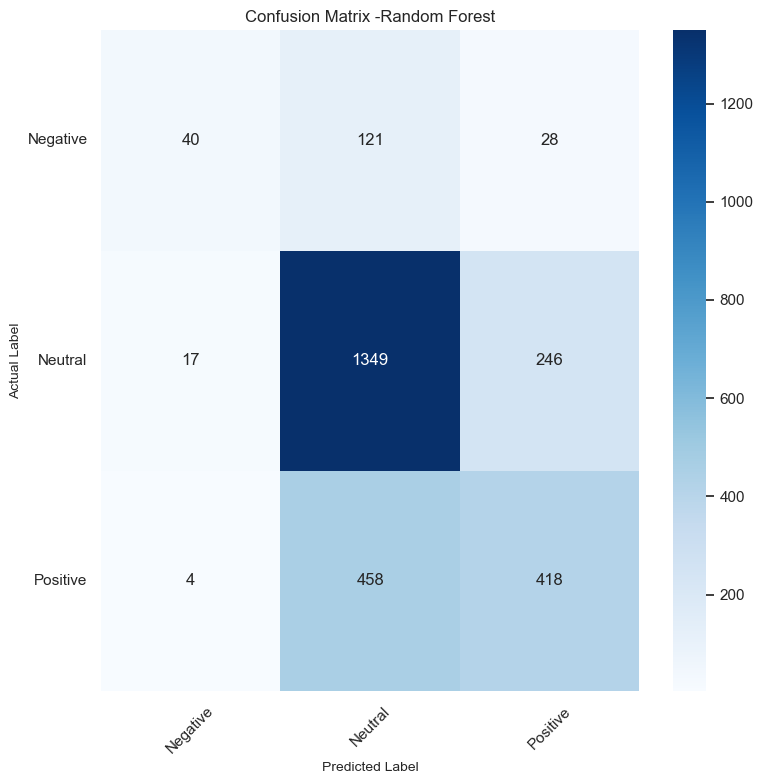

In [48]:
# Define the pipeline
pipe_rf = Pipeline([
    ('smote',SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(class_weight='balanced',random_state=42))
])

# Define the parameter grid for Grid Search
param_grid = {
    'clf__n_estimators': [200],
    'clf__max_depth': [None,5],
    'clf__min_samples_split': [1,5],
    'clf__min_samples_leaf': [1,3]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=pipe_rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(train_tfidf_df, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Best hyperparameters found by grid search
print(f"Best Hyperparameters Random Forest: {best_params}")

# Evaluate the best model on the validation set
y_pred_rf = best_model.predict(test_tfidf_df)

# Classification Report
class_report_rf = classification_report(y_test, y_pred_rf, target_names=['Negative', 'Neutral', 'Positive'],
                output_dict=True)
# Convert the dictionary to a DataFrame and transpose it
rf_report_df = pd.DataFrame(class_report_rf).transpose()

# Round the DataFrame to two decimal places
rf_report_df = rf_report_df.round(2)

# Display the title and the DataFrame
print("Classification Report (Random Forest):")
print(rf_report_df)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion Matrix -Random Forest')


While the ensemble Random Forest has a slightly higher accuracy, the recall and the F1 scores of the Negative and Positive classes are lower than those of the baseline and  tuned Logistic Regression Model. The model is still struggling to distinguish the 2 classes from the Neutral class. This could be because of the significant class imbalance of the minority class - Negative.

**To identify the 3 sentiments, the tuned Logistic Regression Model,while not optimal, gives the best performance for identifying the 3 classes.**

Since identifying the negative sentiments is the central objective of this model, we will proceed to address this problem by doing the following:
- Combine the Neutral and the Positive Classes as the new class 'Other'.
- Build a model with a resampled subset of the new class to address the class imbalance.
- Run a Logistics Regression Model and an Ensemble Model on the resampled and combined dataset.


### 2.3 Objective # 3
### Train,Tune and Evaluate at least 3 Classification Models to identify Negative Sentiments

- We will combine the neutral and positive sentiments into one class - 'Other'
- We will use a random sample of 800 tweets from this new 'Other' class in order to manage the class imbalance with the negative tweets
- We will train this subset of balanced tweets using a combination of baseline and ensemble models
- Determine the model with the best overall accuracy and the best recall score specifically for the negative tweets. Recall is important because it ensures that most of the relevant negative tweets are detected. A high recall means fewer negative tweets are missed, which is crucial because the  purpose of the modeling process is to catch as many negative sentiments as possible.


In [55]:
# Use df.copy to get a new df to get 500 samples

data = df.copy()
data.head()

# Rename all 'Neutral' and 'Positive labels to 'Other'
data['sentiment'] = data['sentiment'].replace(['Neutral', 'Positive'], 'Other')

# Separate the positive and negative samples
other_samples = data[data['sentiment'] == 'Other']
negative_samples = data[data['sentiment'] == 'Negative']

# Sample 500 positive samples
other_samples_balanced = other_samples.sample(n=800, random_state=42)

# Combine the sampled positive samples with all negative samples
balanced_data = pd.concat([other_samples_balanced, negative_samples])

# Shuffle the combined dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_data.shape)
print(balanced_data['sentiment'].value_counts())



(1370, 3)
sentiment
Other       800
Negative    570
Name: count, dtype: int64


In [56]:
# DeFine the features and target
X = balanced_data['tweet']
y = balanced_data['sentiment']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Apply the preprocessing function to the text data
X_train_preprocessed = X_train.apply(preprocess_text)
X_test_preprocessed = X_test.apply(preprocess_text)

# Create DataFrames to store the data
train_df = pd.DataFrame({'tweet': X_train_preprocessed})
test_df = pd.DataFrame({'tweet': X_test_preprocessed})

# tokenize text
train_df['tweet'] = train_df['tweet'].apply(tokenize_text)
test_df['tweet'] = test_df['tweet'].apply(tokenize_text)

# Join tokens for each preprocessed set, applying it to each element
X_train_joined = train_df['tweet'].apply(join_tokens)
X_test_joined = test_df['tweet'].apply(join_tokens)

# Apply TF-IDF to the joined tokenized text
X_train_bal = tfidf_vectorizer.fit_transform(X_train_joined)
X_test_bal = tfidf_vectorizer.transform(X_test_joined)


# Verify the shape of the transformed data
print("Training set shape:", X_train_bal.shape)
print("Testing set shape:", X_test_bal.shape)


# Display the first 5 rows of the sparse matrix
X_train_bal = pd.DataFrame(X_train_bal.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
X_test_bal = pd.DataFrame(X_test_bal.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("Training set:\n", X_train_bal.head())
print("Testing set:\n", X_test_bal.head())


Training set shape: (959, 2885)
Testing set shape: (411, 2885)
Training set:
    ______  abandoned  abc  able  aboutto  abroad  abt  acc  access  \
0     0.0        0.0  0.0   0.0      0.0     0.0  0.0  0.0     0.0   
1     0.0        0.0  0.0   0.0      0.0     0.0  0.0  0.0     0.0   
2     0.0        0.0  0.0   0.0      0.0     0.0  0.0  0.0     0.0   
3     0.0        0.0  0.0   0.0      0.0     0.0  0.0  0.0     0.0   
4     0.0        0.0  0.0   0.0      0.0     0.0  0.0  0.0     0.0   

   accessible  ...  zuckerberg  zzzs  âä_çáîùã¾ûâãôûârt   ã_  \
0         0.0  ...         0.0   0.0                0.0  0.0   
1         0.0  ...         0.0   0.0                0.0  0.0   
2         0.0  ...         0.0   0.0                0.0  0.0   
3         0.0  ...         0.0   0.0                0.0  0.0   
4         0.0  ...         0.0   0.0                0.0  0.0   

   ä_ûâüâ_âãªã_âä_â_ä   ûï  ûïbuttons  ûïthe   ûò   ûó  
0                 0.0  0.0        0.0    0.0  0.0  0.0  
1 

Classification Report Baseline Logistic Regression Balanced Classes:
              precision  recall  f1-score  support
Negative           0.69    0.75      0.72   183.00
Other              0.78    0.73      0.76   228.00
accuracy           0.74    0.74      0.74     0.74
macro avg          0.74    0.74      0.74   411.00
weighted avg       0.74    0.74      0.74   411.00


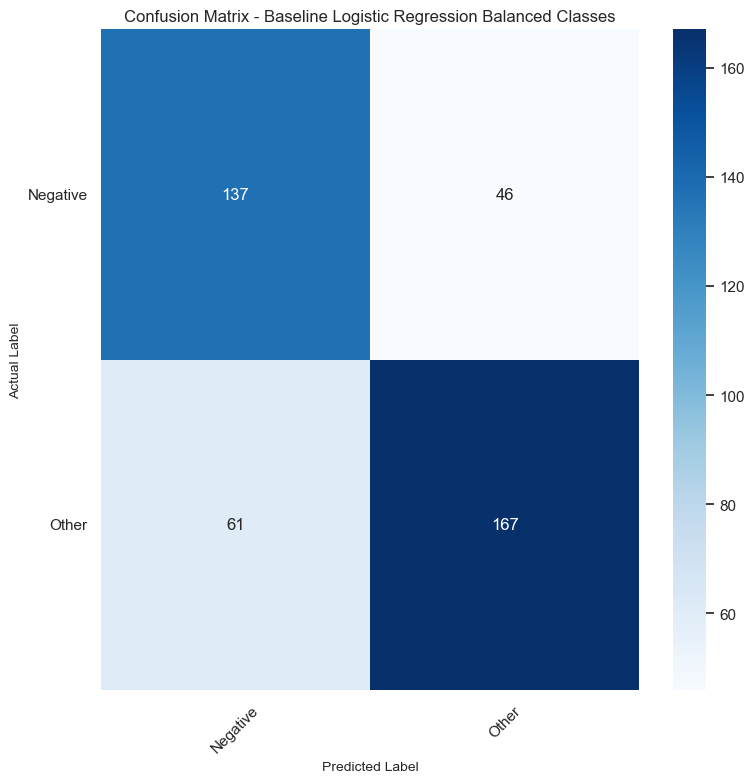

In [58]:
from sklearn.pipeline import Pipeline

# Create a pipeline with the estimator
pipe2_lr = Pipeline([
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced',random_state=42))
])

# Fit the pipeline on the training data
pipe2_lr.fit(X_train_bal, y_train)

# Evaluate on the validation set
y_pred_lr = pipe2_lr.predict(X_test_bal)

# Classification Report
class_report_lr = classification_report(y_test, y_pred_lr, target_names=['Negative', 'Other'],
                output_dict=True)
# Convert the dictionary to a DataFrame and transpose it
lr3_report_df = pd.DataFrame(class_report_lr).transpose()

# Round the DataFrame to two decimal places
lr3_report_df = lr3_report_df.round(2)

# Display the title and the DataFrame
print("Classification Report Baseline Logistic Regression Balanced Classes:")
print(lr3_report_df)

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_names = ['Negative', 'Other']

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix_lr, classes=class_names, 
                      title='Confusion Matrix - Baseline Logistic Regression Balanced Classes')

Boom! With a more balanced dataset, the model performance has improved significantly. With an accuracy of 74% and recall of 75% for the Negative class. The model has gotten much better in identifying the negative class. Moreover, all the scores precision, recall and FI scores are balanced.. This shows that the model has greatly benefited from the balanced real data as opposed to the synthetic data from the SMOTE oversampling. The balanced scores are an indication that the model is able to distinguish between the 2 classes in an almost similar way(although slightly better for thr Other class). 

We will train a tuned Logistic Regression Model.

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Hyperparameters: {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Classification Report Tuned Logistic Regression Balanced Classes:
              precision  recall  f1-score  support
Negative           0.71    0.73      0.72   183.00
Other              0.78    0.76      0.77   228.00
accuracy           0.74    0.74      0.74     0.74
macro avg          0.74    0.74      0.74   411.00
weighted avg       0.75    0.74      0.74   411.00


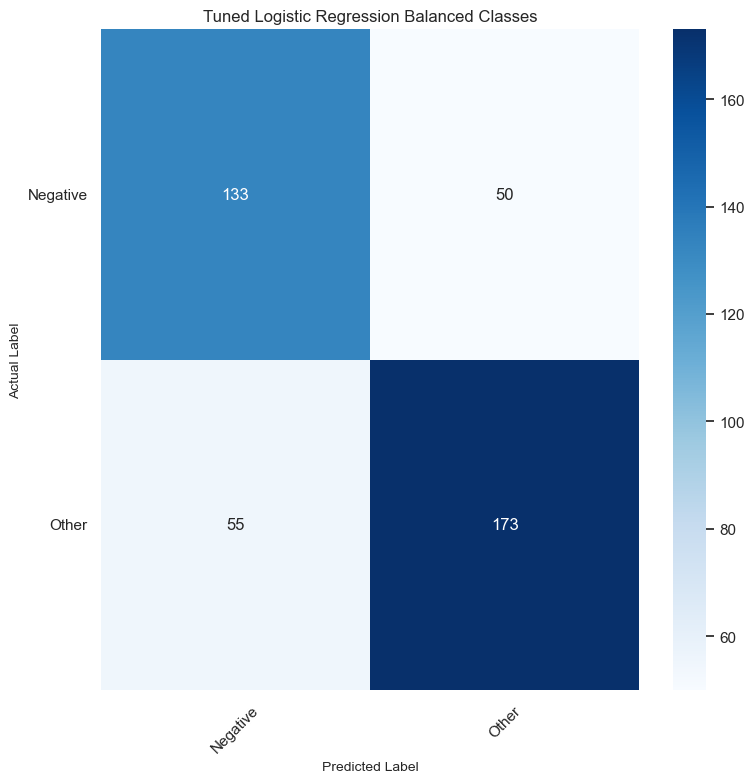

In [65]:
# Define the hyperparameters for grid search
param_grid = {
    'clf__C': [0.01, 0.1,10],              # Regularization strength for Logistic Regression
    'clf__penalty': ['l2'],              # Regularization penalty (L2 is common for LR)
    'clf__solver': ['liblinear','saga'] # Solver to use in the optimization problem
}

# Set up the GridSearchCV
grid_search = GridSearchCV(pipe2_lr, param_grid, cv=5, verbose=1, n_jobs=1)

# Fit the grid search on the training data
grid_search.fit(X_train_bal, y_train)

# Best hyperparameters found by grid search
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Evaluate on the validation set using the best estimator
y_pred_lr = grid_search.best_estimator_.predict(X_test_bal)

# Classification Report
class_report_lr = classification_report(y_test, y_pred_lr,target_names=['Negative', 'Other'],
                output_dict=True)

# Convert the dictionary to a DataFrame and transpose it
lr4_report_df = pd.DataFrame(class_report_lr).transpose()

# Round the DataFrame to two decimal places
lr4_report_df = lr4_report_df.round(2)

# Display the title and the DataFrame
print("Classification Report Tuned Logistic Regression Balanced Classes:")
print(lr4_report_df)

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_names = ['Negative', 'Other']
# Plot the confusion matrix (assuming plot_confusion_matrix is a custom function)
plot_confusion_matrix(conf_matrix_lr, classes=class_names, title='Tuned Logistic Regression Balanced Classes')


While this model is performing relatively well, the baseline Logistics Model has an advantage in the identification of the Negative Class as it has a slightly higher recall of 75%.

We will use the Random Forest Ensemble method to see if this performance can be improved further. 

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters Random Forest Binary: {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
Classification Report Random Forest Balance Classes:
              precision  recall  f1-score  support
Negative           0.76    0.58      0.66   183.00
Other              0.72    0.86      0.78   228.00
accuracy           0.73    0.73      0.73     0.73
macro avg          0.74    0.72      0.72   411.00
weighted avg       0.74    0.73      0.73   411.00


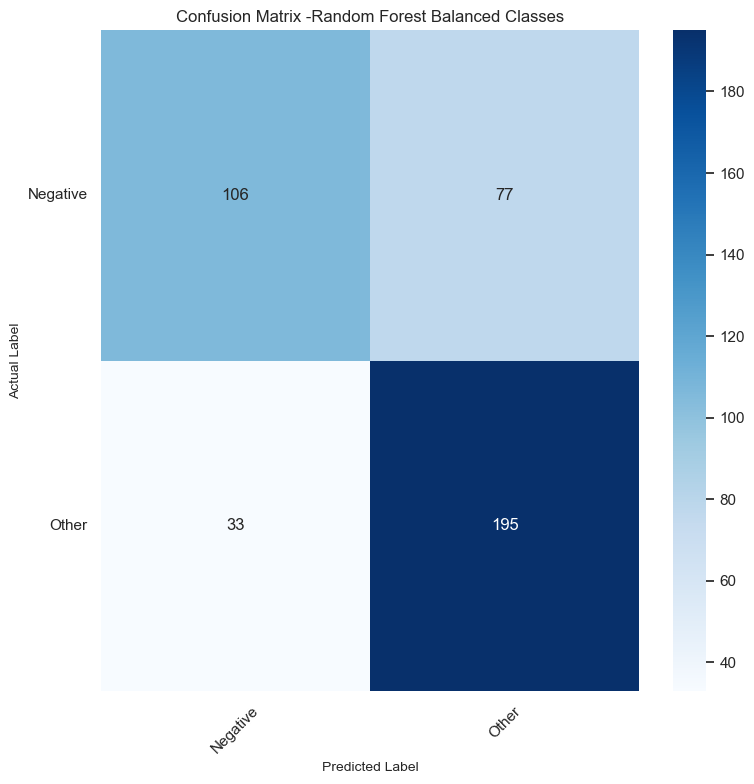

In [60]:
# Define the pipeline
pipe2_rf = Pipeline([
     ('clf', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for Grid Search
param_grid = {
    'clf__n_estimators': [100,200],
    'clf__max_depth': [None,5],
    'clf__min_samples_split': [1,5],
    'clf__min_samples_leaf': [1,3]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=pipe2_rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_bal, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Best hyperparameters found by grid search
print(f"Best Hyperparameters Random Forest Binary: {best_params}")

# Evaluate the best model on the validation set
y_pred_rf = best_model.predict(X_test_bal)

# Classification Report
class_report_rf = classification_report(y_test, y_pred_rf,target_names=['Negative', 'Other'],
                output_dict=True)


# Convert the dictionary to a DataFrame and transpose it
rf2_report_df = pd.DataFrame(class_report_rf).transpose()

# Round the DataFrame to two decimal places
rf2_report_df = rf2_report_df.round(2)

# Display the title and the DataFrame
print("Classification Report Random Forest Balance Classes:")
print(rf2_report_df)


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion Matrix -Random Forest Balanced Classes')


While the accuracy is more or less that of the Logistics Models, the recall score at 58% of the negative class is much lower. This model, while being quite good at distinguishing the Other class, is struggling with the negative class.

Next we will try the AdaBoost Model.

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best AdaBoost Hyperparameters: {'clf__base_estimator__max_depth': 3, 'clf__learning_rate': 0.1, 'clf__n_estimators': 100}
Classification Report AdaBoost Balance Classes:
              precision  recall  f1-score  support
Negative           0.69    0.61      0.65    183.0
Other              0.71    0.78      0.74    228.0
accuracy           0.70    0.70      0.70      0.7
macro avg          0.70    0.69      0.70    411.0
weighted avg       0.70    0.70      0.70    411.0


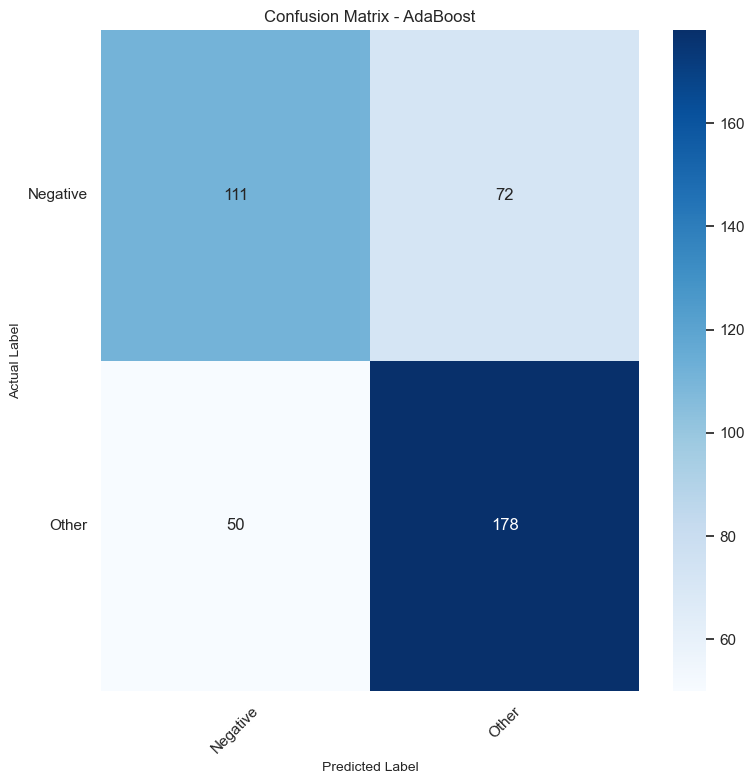

In [61]:
# Define the pipeline
pipe_ada = Pipeline([
    ('clf', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced', random_state=42), 
            random_state=42))
])

# Define the parameter grid for Grid Search
param_grid = {
    'clf__n_estimators': [100, 200],              # Number of boosting stages to be run
    'clf__learning_rate': [0.01, 0.1],           # Learning rate
    'clf__base_estimator__max_depth': [3, 5]  # Max depth of the base estimators (Decision Trees)
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=pipe_ada, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_bal, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best AdaBoost Hyperparameters: {best_params}")

# Evaluate the best model on the validation set
y_pred_ada = best_model.predict(X_test_bal)

# Classification Report
class_report_ada = classification_report(y_test, y_pred_ada, target_names=['Negative', 'Other'],
                output_dict=True)

# Convert the dictionary to a DataFrame and transpose it
ada_report_df = pd.DataFrame(class_report_ada).transpose()

# Round the DataFrame to two decimal places
ada_report_df = ada_report_df.round(2)

# Display the title and the DataFrame
print("Classification Report AdaBoost Balance Classes:")
print(ada_report_df)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_ada)
class_names = ['Negative', 'Other']
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion Matrix - AdaBoost')


While the accuracy is lower than that of the Random Forest, the recall score is higher at 61% compared to the RandomForest at 58%. It means this model is better at identifying the Negative Class than the Random Forest.

At this stage , the baseline Logistic Regression model has the best and most balanced performance for both classes.

Next, we will train an XGBoost Model.

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best XGBoost Hyperparameters: {'clf__colsample_bytree': 0.7, 'clf__learning_rate': 0.1, 'clf__subsample': 0.9}
Classification Report XGBoost Balanced Classes:
              precision  recall  f1-score  support
Negative           0.70    0.53      0.60   183.00
Other              0.68    0.82      0.75   228.00
accuracy           0.69    0.69      0.69     0.69
macro avg          0.69    0.68      0.68   411.00
weighted avg       0.69    0.69      0.68   411.00


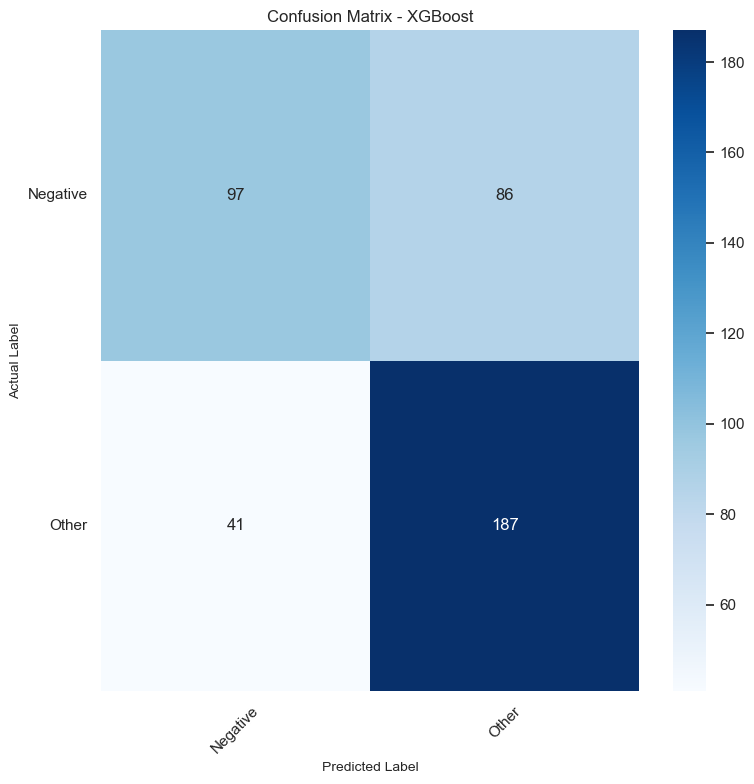

In [63]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training and test target labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the pipeline
pipe_xgb = Pipeline([
       ('clf', xgb.XGBClassifier(objective='binary:logistic', random_state=42))
])

# Define the parameter grid for Grid Search
param_grid = {
    'clf__learning_rate': [0.01, 0.1],
    'clf__subsample': [0.7, 0.9],
    'clf__colsample_bytree': [0.7, 0.9]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=pipe_xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_bal, y_train_encoded)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best XGBoost Hyperparameters: {best_params}")

# Evaluate the best model on the test set
y_pred_xgb = best_model.predict(X_test_bal)
class_report_xgb = classification_report(y_test_encoded, y_pred_xgb,target_names=['Negative', 'Other'],
                output_dict=True)

# Convert the dictionary to a DataFrame and transpose it
xgb_report_df = pd.DataFrame(class_report_xgb).transpose()

# Round the DataFrame to two decimal places
xgb_report_df = xgb_report_df.round(2)

# Display the title and the DataFrame
print("Classification Report XGBoost Balanced Classes:")
print(xgb_report_df)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_xgb)

# Class names (ensure these match your label encoding)
class_names = label_encoder.classes_

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_xgb)
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion Matrix - XGBoost')

This model has the worst scores of all the models trained. With low accuracy, and low recall of the negative class, this model does not meet our objective.

So far, in this balanced dataset, the best model is the baseline Logistics model, and this is the model that will be recommended for deployment.

## 3.0 Recommendations

### 3.1 Sentiment Anaysis and Competition Landscape
**Popularity and Sentiment Balance:** The analysis shows that Apple products are significantly more popular than Google products, indicated by the higher number of tweets. However, the proportion of negative sentiments towards Apple products is also higher. This implies that Apple needs to be particularly vigilant in monitoring and addressing negative sentiments to maintain its market position.**'With great power comes great responsibility'**

**Strategy for Negative Sentiments:** Given the higher proportion of negative sentiments, Apple should implement a proactive approach to identify, understand, and address customer complaints and issues. This could include enhancing customer service, improving product quality, and engaging with users on social media platforms to resolve their concerns.

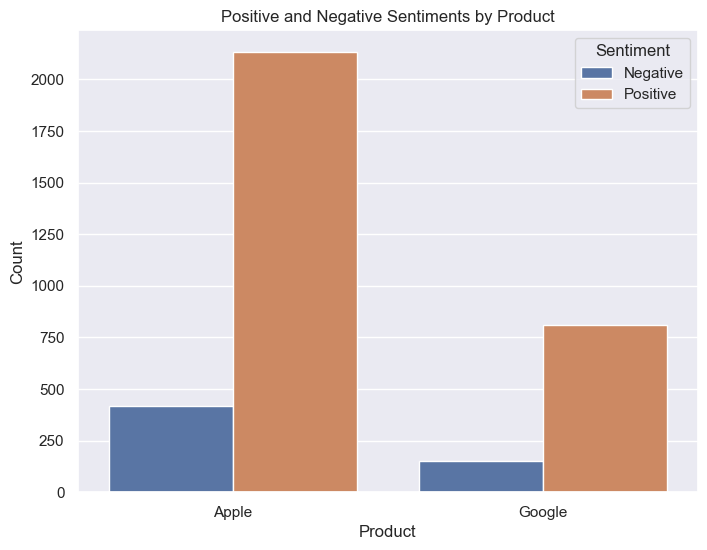

In [75]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_filtered, x='product', hue='sentiment')
plt.title('Positive and Negative Sentiments by Product')
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

### 3.2 Model Performance and Selection

#### 3.2.1 Evaluation of Sentiment Classification Models to Identify the Positive,Neutral and Negative Classes

In [54]:
print("Classification Report (Baseline Logistic Regression):")
print(lr_report_df)
print()
print("Classification Report (Tuned Logistic Regression):")
print(lr2_report_df)
print()
print("Classification Report (Random Forest):")
print(rf_report_df)
    

Classification Report (Baseline Logistic Regression):
              precision  recall  f1-score  support
Negative           0.37    0.48      0.41   189.00
Neutral            0.74    0.72      0.73  1612.00
Positive           0.56    0.56      0.56   880.00
accuracy           0.65    0.65      0.65     0.65
macro avg          0.56    0.58      0.57  2681.00
weighted avg       0.66    0.65      0.65  2681.00

Classification Report (Tuned Logistic Regression):
              precision  recall  f1-score  support
Negative           0.42    0.39      0.40   189.00
Neutral            0.74    0.74      0.74  1612.00
Positive           0.57    0.58      0.57   880.00
accuracy           0.66    0.66      0.66     0.66
macro avg          0.57    0.57      0.57  2681.00
weighted avg       0.66    0.66      0.66  2681.00

Classification Report (Random Forest):
              precision  recall  f1-score  support
Negative           0.66    0.21      0.32   189.00
Neutral            0.70    0.84      0

The Baseline Logistic Regression Model showed an overall accuracy of 65%, while the tuned Logistic Regression and Random Forest Model had an accuracy of 66% and 67% respectively. Comparing the Metrics, forthe negative class:

Precision: Random Forest has a higher precision (0.66 vs. 0.37 and 0.42), meaning it is better at avoiding false positives for negative tweets.
Recall: Baseline Logistic Regression has the highest recall (0.48 vs. 0.39 and 0.21), indicating it captures a higher percentage of actual negative tweets compared to the tuned Logistic Regression and the  Random Forest.
F1-Score: Baseline Logistic Regression (0.41) is the highest compared to tuned Logistic Regression and Random Forest (0.40 and 0.32). 

The Baseline Logistic Regression model despite having a slightly lower accuracy offers a more balanced approach with better recall, making it more suitable for applications where capturing all potential negative sentiments is crucial.

The Random Forest model, while offering higher precision, significantly underperforms in recall, making it less effective for identifying negative sentiments comprehensively.

**The Baseline Logistic Model in this case is the better model for identification of the 3 classes, as it has the best recall for the negative class, and still rallies favourably on the other classes,albeit slightly lower than the other models.**

For practical business purposes, focusing on improving the recall of the Negative Class should be the ultimate goal.

#### 3.2.2 Evaluation of Sentiment Classification Models to Identify the Negative Class
The primary objective of any sentiment analysis initiative within an organization is to accurately identify negative sentiments. This allows the organization to pinpoint issues and concerns raised by customers and develop strategies to address these challenges. Unfortunately, our initial modeling approach did not achieve satisfactory results for the negative class, with our best model yielding a recall of only 48%.

This sub-optimal performance can be attributed to class imbalance. Although we employed SMOTE to oversample the minority class, the synthetic data generated did not significantly enhance model performance. In our quest to develop a model with a higher recall for the negative class, we undertook the following steps:

- Class Consolidation: We combined the Neutral and Positive classes into a new class labeled 'Other'.
- Resampling: We built a model with a resampled subset of the new class to address the class imbalance.
- ModelTraining:We trained both baseline and tuned Logistic Regression models, along with three Ensemble models.

The following is the result of the top 3 best performing models:

In [64]:
print("Classification Report Baseline Logistic Regression Balanced Classes:")
print(lr3_report_df)
print()
print("Classification Report Tuned Logistic Regression Balanced Classes:")
print(lr4_report_df)
print()
print("Classification Report Random Forest Balanced Classes:")
print(rf2_report_df)

Classification Report Baseline Logistic Regression Balanced Classes:
              precision  recall  f1-score  support
Negative           0.69    0.75      0.72   183.00
Other              0.78    0.73      0.76   228.00
accuracy           0.74    0.74      0.74     0.74
macro avg          0.74    0.74      0.74   411.00
weighted avg       0.74    0.74      0.74   411.00

Classification Report Tuned Logistic Regression Balanced Classes:
              precision  recall  f1-score  support
Negative           0.71    0.73      0.72   183.00
Other              0.78    0.76      0.77   228.00
accuracy           0.74    0.74      0.74     0.74
macro avg          0.74    0.74      0.74   411.00
weighted avg       0.75    0.74      0.74   411.00

Classification Report Random Forest Balanced Classes:
              precision  recall  f1-score  support
Negative           0.76    0.58      0.66   183.00
Other              0.72    0.86      0.78   228.00
accuracy           0.73    0.73      0.73   

After evaluating the performance of the different models, it is evident that the Baseline Logistic Regression model provides the highest recall for the negative class at 75%, which is crucial for identifying negative sentiments accurately. The Tuned Logistic Regression model, while having slightly higher precision, has a recall of 73% for the negative class. The Random Forest model, although having higher precision for the negative class, has a lower recall compared to the Baseline Logistic Regression model.

Given the focus on identifying negative sentiments accurately, we recommend adopting the Baseline Logistic Regression model with balanced classes. This model achieves the highest recall for the negative class, ensuring that a higher number of negative sentiments are accurately identified. This will help the organization effectively address customer concerns and develop strategies to mitigate issues.

## 4.0 Next Steps

**Deploy the Selected Model:** Implement the Baseline Logistic Regression model with balanced classes into a production environment. Ensure you have a pipeline for real-time or batch processing of new tweets to classify the sentiment efficiently. This involves setting up the infrastructure, such as cloud services or servers, and integrating the model into existing systems.

**Continuous Model Monitoring and Improvement:** Establish a system to monitor the performance of the deployed model regularly. Collect feedback, track key metrics like precision, recall, and F1-score, and analyze any drifts in data or model accuracy. Schedule periodic retraining of the model with new, better labeled data to improve its performance and relevance.

**Develop a Sentiment Response Strategy:** Based on the insights derived from the sentiment analysis, create a comprehensive strategy for responding to negative sentiments identified in the tweets. This could include setting up automated alert systems for negative sentiment spikes, defining customer service protocols for addressing issues, and developing content strategies to engage with customers and improve brand perception.

These steps will ensure that the sentiment analysis model continues to deliver valuable insights and helps Apple proactively address customer concerns.